In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn import linear_model
from regress2 import regress2
import seaborn as sns

from sklearn import decomposition as decomp
from sklearn import preprocessing as prep
from sklearn import manifold as mfold

In [2]:
iniN = 3
endN = 52
interest = np.asarray([21,23,24,51,49,26]) - iniN
perbasis = 'accession'

src = '../hpcc/traditional/'
dst = '../hpcc/results/trad/'
traitnames = ['Ease of Removal', 'Shell Strength', 'Kernel Weight Ratio']

filename = src + 'qual_quant_' + perbasis + '_summary.csv'
df = pd.read_csv(filename, dtype={1:str})

df = df.drop(index = df[df['PercentKernel'] == -1].index)
df['TipShrivel'] /= 100
df['MinorShrivel'] /= 100
df['MajorShrivel'] /= 100
df['PercentKernel'] /= 100

print(df.shape)

filename = src + 'col_labels.csv'
labels = pd.read_csv(filename, dtype=str, keep_default_na = False)
print(labels.shape)

cattraitnames = df.columns[endN:].values[[12,4,13,1,3,7,6,11,0,2]]

marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
#col_wong = ['#e69f00', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']
col_wong = ['#d81b60', '#1e88e5', '#ffc107', '#004d40', '#56e495']
col_wong += col_wong

df.head()

(149, 67)
(67, 2)


,UCACCSD,nut_count,plot_count,nut_length,nut_height,nut_width,nut_vol,nut_va3d,nut_ratio_feret,nut_area,...,ShellThickness,PackingTissue,KernelFill,TipShrivel,MinorShrivel,MajorShrivel,Plumpness,EaseOfRemoval,PercentKernel,Blank
0,03-001-3395,6,4,41.382216,34.552443,34.683614,23138.271108,5.061907,1.205837,6740.977257,...,1.075000,5.000000,4.750000,0.000000,0.000000,0.0,4.750000,4.500000,0.623294,0.000000
1,04-004-626,9,1,41.655988,36.264753,33.735949,24456.070925,4.624070,1.234757,6783.986184,...,1.100000,5.000000,6.000000,0.000000,0.000000,0.0,4.000000,5.000000,0.583988,0.000000
2,06-004-4,16,7,37.071349,34.994222,32.470430,20701.067413,4.320171,1.151675,5927.755393,...,1.114286,5.000000,5.000000,0.000000,0.031746,0.0,3.857143,4.857143,0.589313,5.714286
3,06-005-27,15,4,40.523602,33.250514,31.082693,19961.358383,4.605803,1.304487,5915.986251,...,1.475000,5.750000,5.250000,0.000000,0.000000,0.0,3.500000,5.750000,0.482632,2.500000
4,06-030-18,5,3,37.920928,32.983651,31.577548,18617.977820,4.443319,1.201473,5582.720320,...,1.233333,5.666667,5.666667,0.033333,0.000000,0.0,5.000000,5.666667,0.461030,0.000000


# Z-score

In [22]:
imgfeats = df.iloc[:,interest+iniN].values.copy()
#scaler = prep.StandardScaler().fit(imgfeats[:, interest])
#imgfeats = scaler.transform(imgfeats[:, interest])

scaler = prep.StandardScaler().fit(imgfeats)
imgfeats = scaler.transform(imgfeats)

print(imgfeats.shape)

earliest = df[df['EaseOfRemoval'] == 7.5]
eidx = earliest.index.values[0]
foo = np.array(list(range(eidx)) + list(range(eidx+1, len(df))))
foo

(149, 6)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143,
       144, 145, 146, 147, 148])

# PCA

In [23]:
pca = decomp.PCA(n_components=2, svd_solver='full')
pca.fit(imgfeats)

print(100*pca.explained_variance_ratio_[:10])
print(pca.singular_values_[:10])
print(100*np.cumsum(pca.explained_variance_ratio_)[:10])

redux = pca.transform(imgfeats)
print(redux.shape)

[63.36258631 22.02939856]
[23.80045213 14.03363186]
[63.36258631 85.39198487]
(149, 2)


../hpcc/results/trad/pca_select_phenos_accession


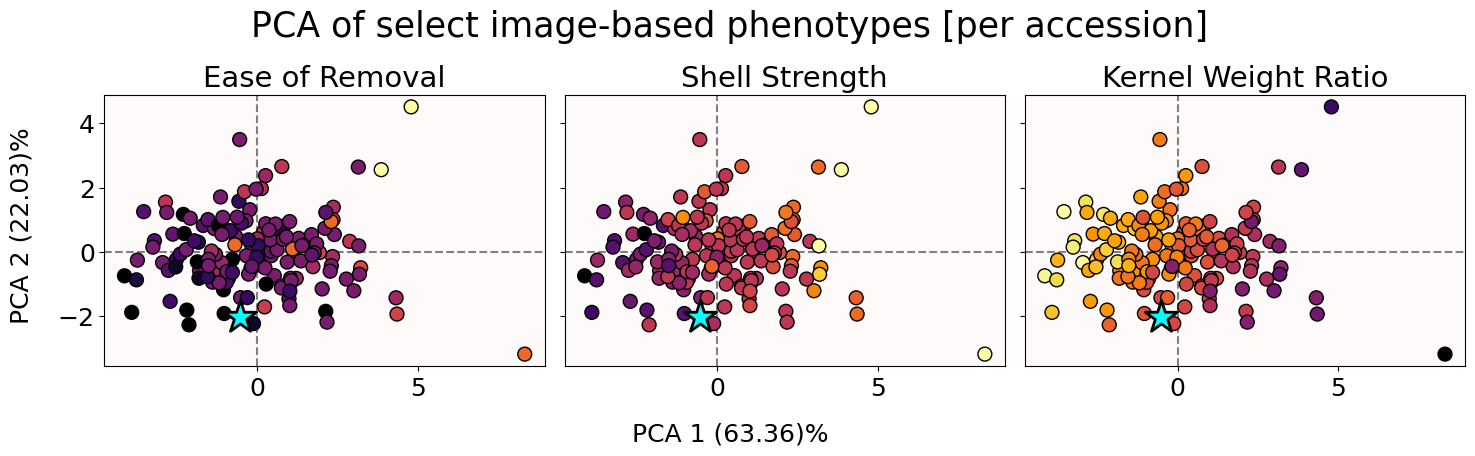

In [25]:
rxtech = "PCA"
title = rxtech + " of select image-based phenotypes [per " +perbasis+ "]"

fs = 18
fig, ax = plt.subplots(1,3, figsize=(15,4.5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    ax[idx].scatter(redux[foo,0], redux[foo,1],
                    c = df.loc[foo,cattraitnames[idx]].values,
                    s=100, alpha=1, cmap='inferno',
                    edgecolors='k', zorder=2)
    
    ax[idx].scatter(redux[eidx,0], redux[eidx,1],
                    s=600, alpha=1, color='cyan', marker='*', linewidths=2,
                    edgecolors='k', zorder=3)
    ax[idx].set_title(traitnames[idx], fontsize=fs+3);
    ax[idx].set_aspect('equal')
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    ax[idx].axvline(0, c='gray', ls='--', zorder=1)
    ax[idx].axhline(0, c='gray', ls='--', zorder=1)
    
fig.supxlabel('PCA 1 ({:.2f})%'.format(pca.explained_variance_ratio_[0]*100), fontsize=fs)
fig.supylabel('PCA 2 ({:.2f})%'.format(pca.explained_variance_ratio_[1]*100), fontsize=fs);

fig.suptitle(title, fontsize=fs+7)
fig.tight_layout();

filename = dst + rxtech.lower() + '_select_phenos_' + perbasis
print(filename)
#plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')
plt.savefig(filename + '.svg', format='svg', bbox_inches='tight')

# KPCA

In [53]:
kpca = decomp.KernelPCA(n_components=2, 
                        kernel='rbf', 
                        gamma = 0.01, 
                        degree = 3,
                        coef0 = 1,
                        fit_inverse_transform=False, eigen_solver='dense')
kredux = kpca.fit_transform(imgfeats)

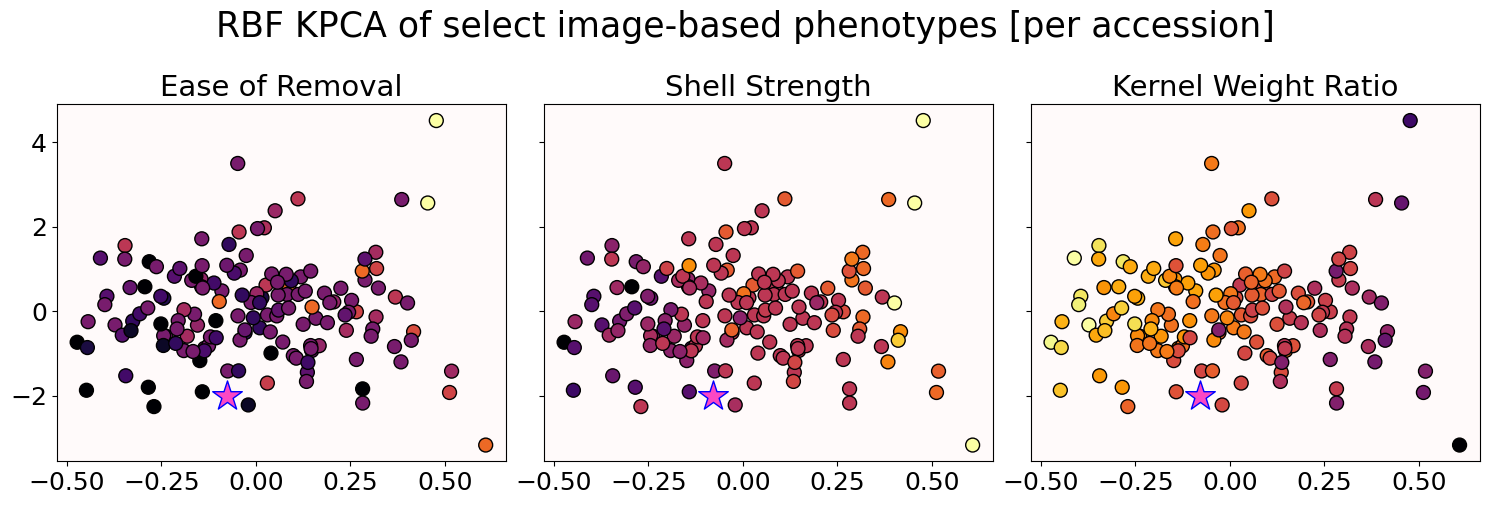

In [54]:
rxtech = "RBF KPCA"
title = rxtech + " of select image-based phenotypes [per " +perbasis+ "]"

fs = 18
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    ax[idx].scatter(kredux[foo,0], redux[foo,1],
                    c = df.loc[foo,cattraitnames[idx]].values,
                    s=100, alpha=1, cmap='inferno',
                    edgecolors='k', zorder=2)
    
    ax[idx].scatter(kredux[eidx,0], redux[eidx,1],
                    s=500, alpha=1, color='#FB48C4', marker='*',
                    edgecolors='blue', zorder=3)

    ax[idx].set_title(traitnames[idx], fontsize=fs+3);
    #ax[idx].set_aspect('equal')
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle(title, y=1, fontsize=fs+7)
fig.tight_layout();

filename = dst + rxtech.lower().replace(' ','_') + '_select_phenos_' + perbasis
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# Isomap

In [55]:
iso = mfold.Isomap(n_components=2, n_neighbors=7)
iredux = iso.fit_transform(imgfeats)
print(iredux.shape)

(149, 2)


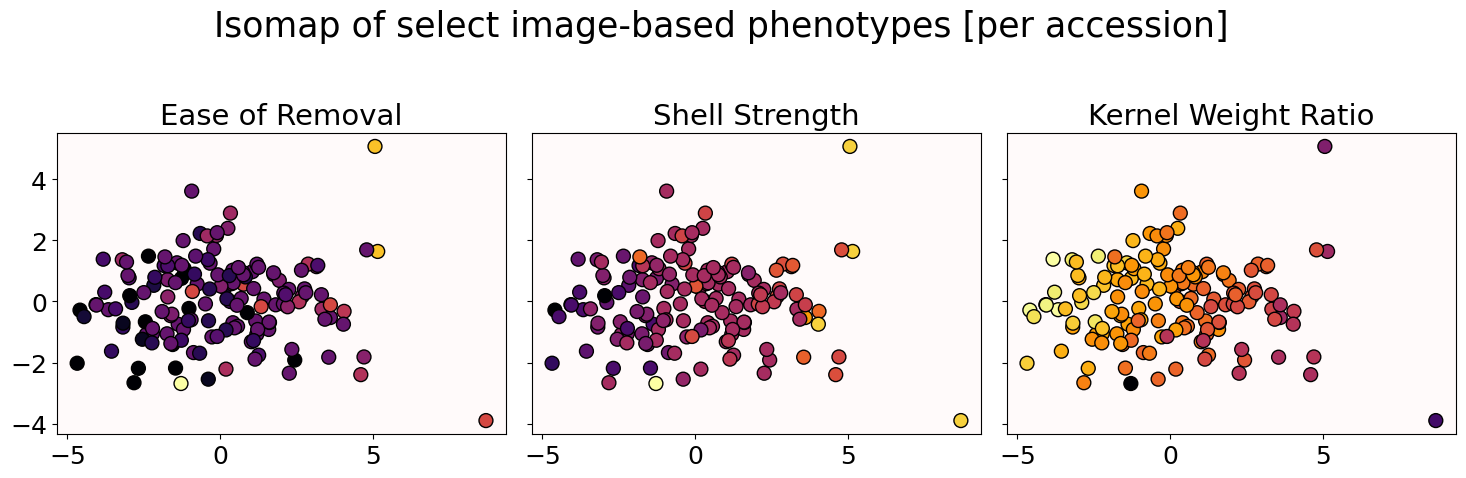

In [56]:
rxtech = "Isomap"
title = rxtech + " of select image-based phenotypes [per " +perbasis+ "]"

fs = 18
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

idx = 0

for idx in range(len(ax)):
    ax[idx].scatter(iredux[:,0], iredux[:,1],
                    c = df.loc[:,cattraitnames[idx]].values,
                    s=100, alpha=1, cmap='inferno',
                    edgecolors='k')

    ax[idx].set_title(traitnames[idx], fontsize=fs+3);
    ax[idx].set_aspect('equal')
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle(title, y=1, fontsize=fs+7)
fig.tight_layout();

filename = dst + rxtech.lower().replace(' ','_') + '_select_phenos_' + perbasis
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# LLE

(149, 2)


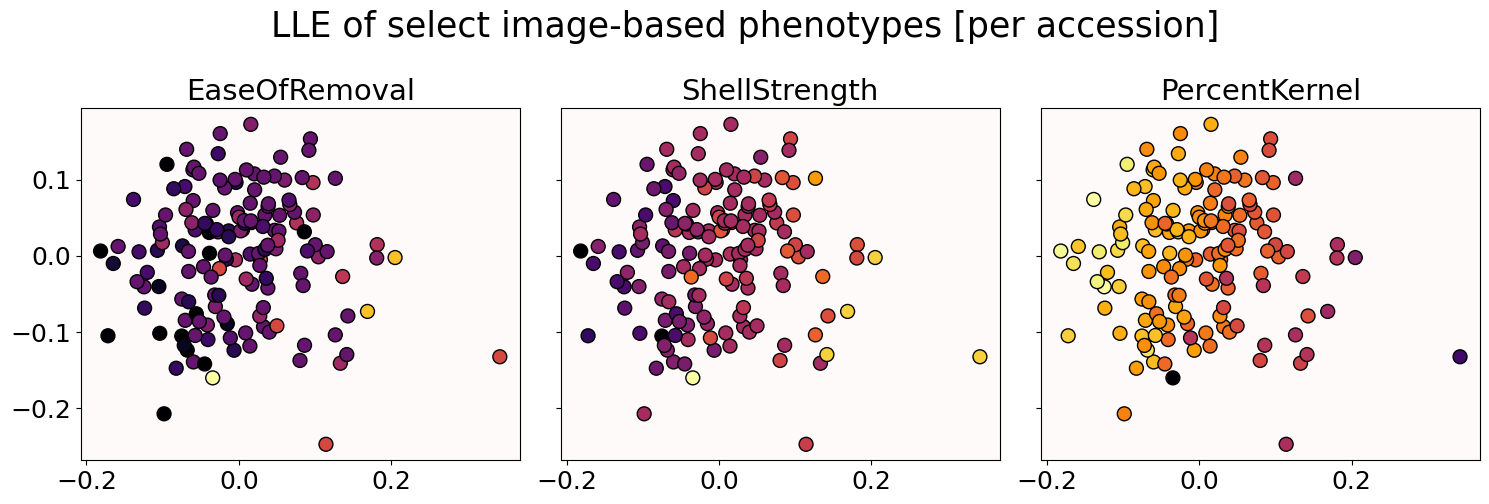

In [49]:
lle = mfold.LocallyLinearEmbedding(n_components=2, n_neighbors=12)
lredux = lle.fit_transform(imgfeats)
print(lredux.shape)

rxtech = "LLE"
title = rxtech + " of select image-based phenotypes [per " +perbasis+ "]"

fs = 18
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

for idx in range(len(ax)):
    ax[idx].scatter(lredux[:,0], lredux[:,1],
                    c = df.loc[:,cattraitnames[idx]].values,
                    s=100, alpha=1, cmap='inferno',
                    edgecolors='k')

    ax[idx].set_title(cattraitnames[idx], fontsize=fs+3);
    ax[idx].set_aspect('equal')
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle(title, y=1, fontsize=fs+7)
fig.tight_layout();

filename = dst + rxtech.lower().replace(' ','_') + '_select_phenos_' + perbasis
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# Spectral Embedding

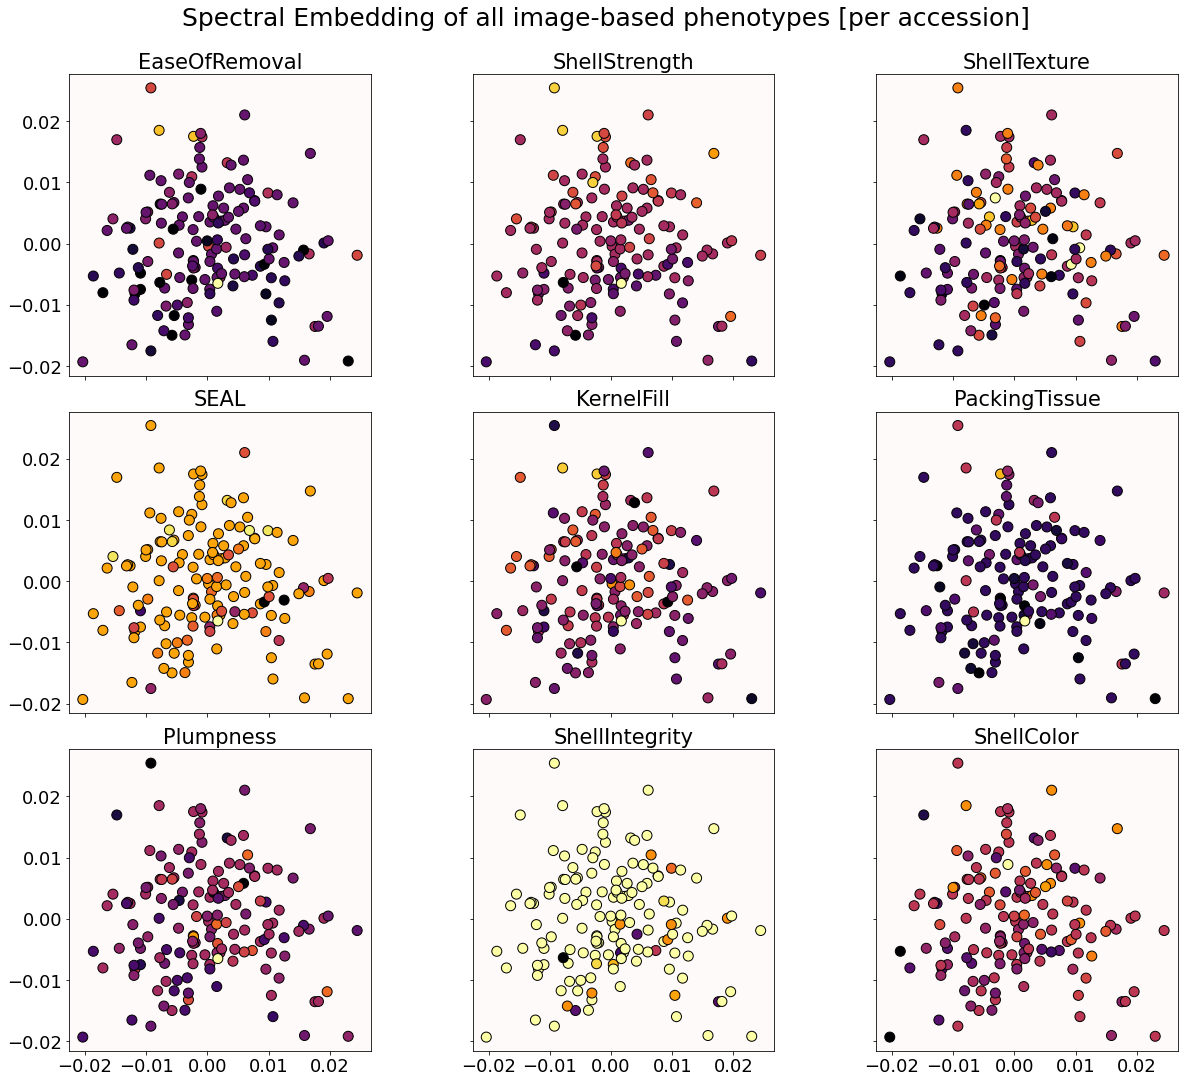

In [103]:
se = mfold.SpectralEmbedding(n_components=2,
                             affinity = 'rbf', #nearest_neighbors,
                             gamma = 0.005,
                             n_neighbors = 22)

sredux = se.fit_transform(imgfeats)

rxtech = "Spectral Embedding"
title = rxtech + " of all image-based phenotypes [per " +perbasis+ "]"

fs = 18
fig, ax = plt.subplots(3,3, figsize=(18,15), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

for idx in range(len(ax)):
    ax[idx].scatter(sredux[:,0], sredux[:,1],
                    c = df.loc[:,cattraitnames[idx]].values,
                    s=100, alpha=1, cmap='inferno',
                    edgecolors='k')

    ax[idx].set_title(cattraitnames[idx], fontsize=fs+3);
    ax[idx].set_aspect('equal')
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle(title, y=1, fontsize=fs+7)
fig.tight_layout();

filename = dst + rxtech.lower().replace(' ','_') + '_all_phenos_' + perbasis
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

# t-SNE

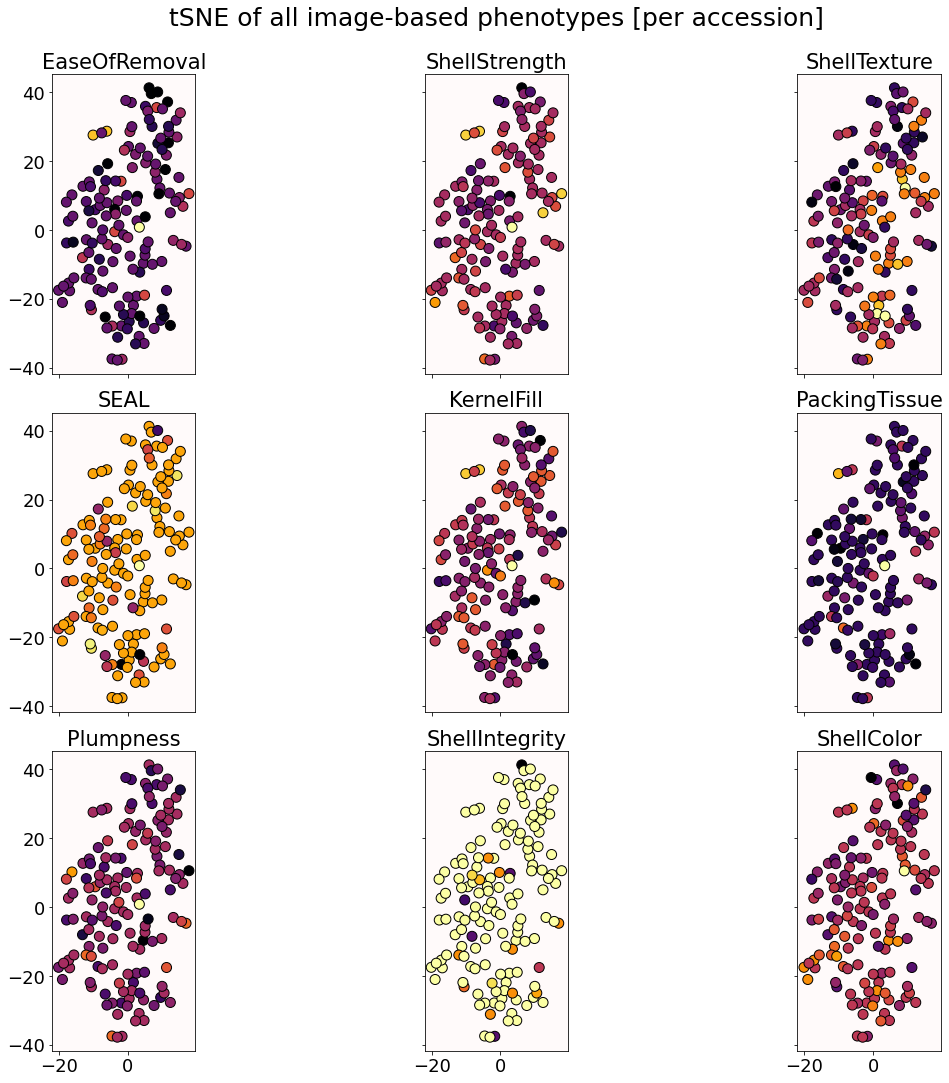

In [105]:
tredux = mfold.TSNE(n_components=2, perplexity=12, early_exaggeration=20).fit_transform(imgfeats)

rxtech = "tSNE"
title = rxtech + " of all image-based phenotypes [per " +perbasis+ "]"

fs = 18
fig, ax = plt.subplots(3,3, figsize=(18,15), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel()

for idx in range(len(ax)):
    ax[idx].scatter(tredux[:,0], tredux[:,1],
                    c = df.loc[:,cattraitnames[idx]].values,
                    s=100, alpha=1, cmap='inferno',
                    edgecolors='k')

    ax[idx].set_title(cattraitnames[idx], fontsize=fs+3);
    ax[idx].set_aspect('equal')
    ax[idx].set_facecolor('snow')
    ax[idx].tick_params(labelsize=fs)
    
fig.suptitle(title, y=1, fontsize=fs+7)
fig.tight_layout();

filename = dst + rxtech.lower().replace(' ','_') + '_all_phenos_' + perbasis
plt.savefig(filename + '.jpg', dpi=135, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')